In [6]:
import pandas as pd 
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_csv("spam_ham_dataset.csv")


In [8]:
df.sample(5)

,Unnamed: 0,label,text,label_num
441,2386,ham,Subject: texoma - beaumont hpl maintenance\r\n...,0
2970,1938,ham,Subject: revision # 1 - hpl nom for october 31...,0
1480,2143,ham,Subject: fw : fw : fw : dance off to select th...,0
730,1664,ham,Subject: txu fuels / sds nomination for octobe...,0
3310,4019,spam,"Subject: oh boy , i want this ! ydx 6 bd\r\npa...",1


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [11]:
df.duplicated().sum()
df.drop(columns=["label_num"],inplace=True)
df['text'] = df['text'].str.replace('Subject:',"")

In [12]:
df.head()

,Unnamed: 0,label,text
0,605,ham,enron methanol ; meter # : 988291\r\nthis is ...
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attache..."
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to ..."
3,4685,spam,"photoshop , windows , office . cheap . main t..."
4,2030,ham,re : indian springs\r\nthis deal is to book t...


In [13]:
## EDA

In [14]:
df.head()

,Unnamed: 0,label,text
0,605,ham,enron methanol ; meter # : 988291\r\nthis is ...
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attache..."
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to ..."
3,4685,spam,"photoshop , windows , office . cheap . main t..."
4,2030,ham,re : indian springs\r\nthis deal is to book t...


In [15]:
df["label"].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt


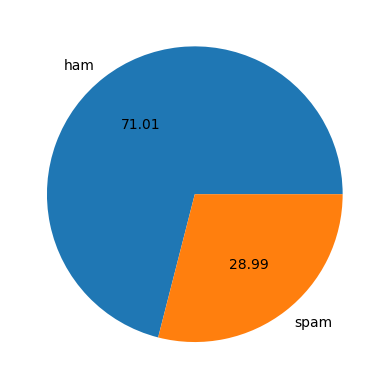

In [17]:
plt.pie(df["label"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [18]:
import nltk

In [19]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Ch
[nltk_data]     Abdullah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df["Characters"]=df["text"].apply(len)

In [21]:
df.head()

,Unnamed: 0,label,text,Characters
0,605,ham,enron methanol ; meter # : 988291\r\nthis is ...,319
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attache...",89
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to ...",2516
3,4685,spam,"photoshop , windows , office . cheap . main t...",406
4,2030,ham,re : indian springs\r\nthis deal is to book t...,328


In [22]:
df["Words"]=df["text"].apply(lambda x:len((nltk.word_tokenize(x))))

In [23]:
df.head()

,Unnamed: 0,label,text,Characters,Words
0,605,ham,enron methanol ; meter # : 988291\r\nthis is ...,319,66
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attache...",89,22
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to ...",2516,549
3,4685,spam,"photoshop , windows , office . cheap . main t...",406,47
4,2030,ham,re : indian springs\r\nthis deal is to book t...,328,69


In [24]:
df["Sentence"]=df["text"].apply(lambda x:len((nltk.sent_tokenize(x))))

In [25]:
df.head()


,Unnamed: 0,label,text,Characters,Words,Sentence
0,605,ham,enron methanol ; meter # : 988291\r\nthis is ...,319,66,3
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attache...",89,22,3
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to ...",2516,549,24
3,4685,spam,"photoshop , windows , office . cheap . main t...",406,47,3
4,2030,ham,re : indian springs\r\nthis deal is to book t...,328,69,3


In [26]:
df[["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,5171.000000,5171.000000,5171.000000
mean,1040.391994,227.181009,13.118159
std,1528.513435,336.487397,27.543055
min,3.000000,0.000000,0.000000
25%,236.000000,50.000000,4.000000
50%,532.000000,120.000000,7.000000
75%,1229.000000,281.500000,15.000000
max,32250.000000,8861.000000,1204.000000


In [27]:
df[df["label"]=="ham"][["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,3672.000000,3672.000000,3672.000000
mean,969.008170,224.239107,11.440904
std,1382.827493,332.179661,24.892442
min,10.000000,1.000000,1.000000
25%,223.750000,49.000000,3.000000
50%,522.000000,122.000000,6.000000
75%,1219.250000,292.000000,13.000000
max,32250.000000,8861.000000,1204.000000


In [28]:
df[df["label"]=="spam"][["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,1499.000000,1499.000000,1499.000000
mean,1215.256171,234.387592,17.226818
std,1825.986210,346.821249,32.801491
min,3.000000,0.000000,0.000000
25%,275.000000,53.000000,4.000000
50%,568.000000,114.000000,9.000000
75%,1245.500000,242.000000,18.500000
max,22065.000000,3961.000000,693.000000


In [29]:
import seaborn as sns

<Axes: xlabel='Characters', ylabel='Count'>

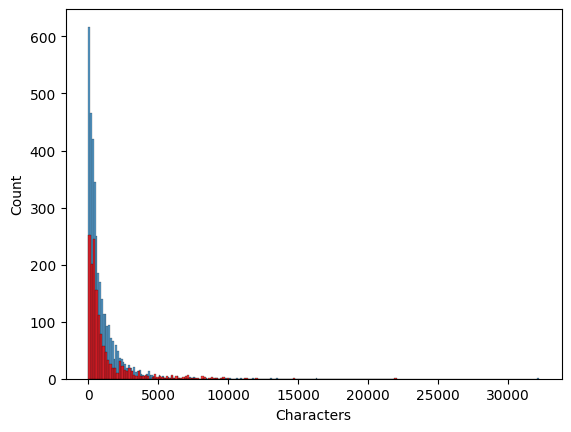

In [30]:

sns.histplot(df[df["label"]=="ham"]["Characters"])
sns.histplot(df[df["label"]=="spam"]["Characters"],color="red")

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer




def texttransform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
           y.append(i)
    

    text=y[:]
    y.clear()

    ps=PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [32]:

df["Transform_Tex"]=df["text"].apply(texttransform)

In [ ]:
df.head()

,Unnamed: 0,label,text,Characters,Words,Sentence,Transform_Tex
0,605,ham,enron methanol ; meter # : 988291\r\nthis is ...,319,66,3,enron methanol meter 988291 follow note gave m...
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attache...",89,22,3,hpl nom januari 9 2001 see attach file hplnol ...
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to ...",2516,549,24,neon retreat ho ho ho around wonder time year ...
3,4685,spam,"photoshop , windows , office . cheap . main t...",406,47,3,photoshop window offic cheap main trend abas d...
4,2030,ham,re : indian springs\r\nthis deal is to book t...,328,69,3,indian spring deal book teco pvr revenu unders...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [ ]:
spam_wc = wc.generate(df[df['label'] == "spam"]['Transform_Tex'].str.cat(sep=" "))

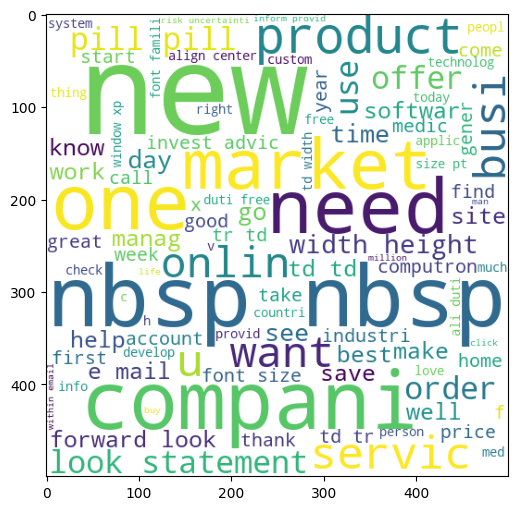

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
spam_wc = wc.generate(df[df['label'] == "ham"]['Transform_Tex'].str.cat(sep=" "))

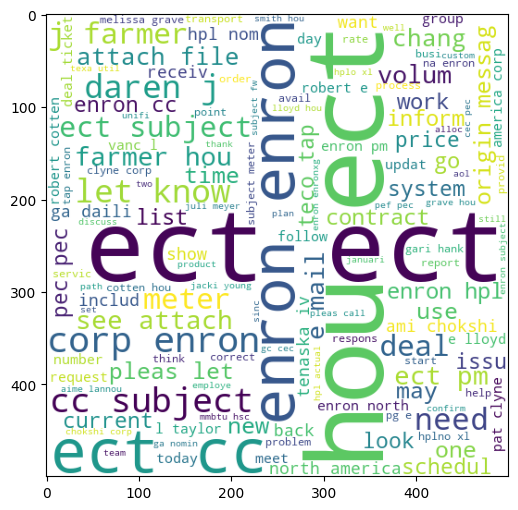

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
df.head()

,Unnamed: 0,label,text,Characters,Words,Sentence,Transform_Tex
0,605,ham,enron methanol ; meter # : 988291\r\nthis is ...,319,66,3,enron methanol meter 988291 follow note gave m...
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attache...",89,22,3,hpl nom januari 9 2001 see attach file hplnol ...
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to ...",2516,549,24,neon retreat ho ho ho around wonder time year ...
3,4685,spam,"photoshop , windows , office . cheap . main t...",406,47,3,photoshop window offic cheap main trend abas d...
4,2030,ham,re : indian springs\r\nthis deal is to book t...,328,69,3,indian spring deal book teco pvr revenu unders...


In [ ]:
spam_corpus = []
for msg in df[df['label'] == "spam"]['Transform_Tex'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

195953

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)


[('3', 1239),
 ('com', 992),
 ('http', 984),
 ('compani', 918),
 ('2', 858),
 ('price', 732),
 ('1', 720),
 ('0', 698),
 ('e', 638),
 ('www', 587),
 ('00', 585),
 ('inform', 557),
 ('get', 555),
 ('font', 515),
 ('email', 513),
 ('5', 510),
 ('pleas', 506),
 ('td', 504),
 ('secur', 499),
 ('statement', 497),
 ('4', 494),
 ('invest', 473),
 ('us', 469),
 ('stock', 467),
 ('product', 463),
 ('7', 457),
 ('time', 449),
 ('new', 432),
 ('may', 421),
 ('nbsp', 418)]

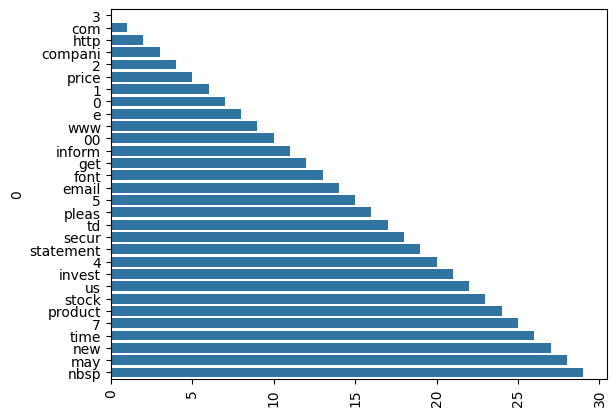

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,Unnamed: 0,label,text,Characters,Words,Sentence,Transform_Tex
0,605,ham,enron methanol ; meter # : 988291\r\nthis is ...,319,66,3,enron methanol meter 988291 follow note gave m...
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attache...",89,22,3,hpl nom januari 9 2001 see attach file hplnol ...
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to ...",2516,549,24,neon retreat ho ho ho around wonder time year ...
3,4685,spam,"photoshop , windows , office . cheap . main t...",406,47,3,photoshop window offic cheap main trend abas d...
4,2030,ham,re : indian springs\r\nthis deal is to book t...,328,69,3,indian spring deal book teco pvr revenu unders...


In [ ]:


from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'spam_corpus' is not defined